2020-Apr-16, Thursday

Notes from https://kingaa.github.io/clim-dis/parest/odes.html

Assume birth rate is same as death rate.<br>
Assume sinusoidal forcing on $\beta$.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def SIR_RHS_OpenSeasonal(t, y, mu, beta_0, beta_1, gamma, N):
    S, I, R = y
    
    beta = beta_0*(1 + beta_1*np.cos(2*np.pi*t))
    
    DS = mu*N - beta*S*I/N - mu*S
    DI = beta*S*I/N - gamma*I - mu*I
    DR = gamma*I - mu*R
    
    dydt = [DS, DI, DR]
    return (dydt)

In [3]:
# Time for integration:
t_start = 0
t_stop = 20
dt = 1./52
t_List = np.arange(t_start, t_stop, dt)

In [4]:
# Parameters:
mu = 1./50
beta_0 = 400.
beta_1 = 0.15
gamma = 28.
N = 1e5

In [5]:
# IC:
S_IC = 7000
I_IC = 50
R_IC = N - S_IC - I_IC
y0 = [S_IC, I_IC, R_IC]
print("IC =", y0)

IC = [7000, 50, 92950.0]


In [6]:
%%time
sol = odeint(func=SIR_RHS_OpenSeasonal, t=t_List, y0=y0, args=(mu, beta_0, beta_1, gamma, N), tfirst=True)

CPU times: user 31.6 ms, sys: 2.19 ms, total: 33.8 ms
Wall time: 36.5 ms


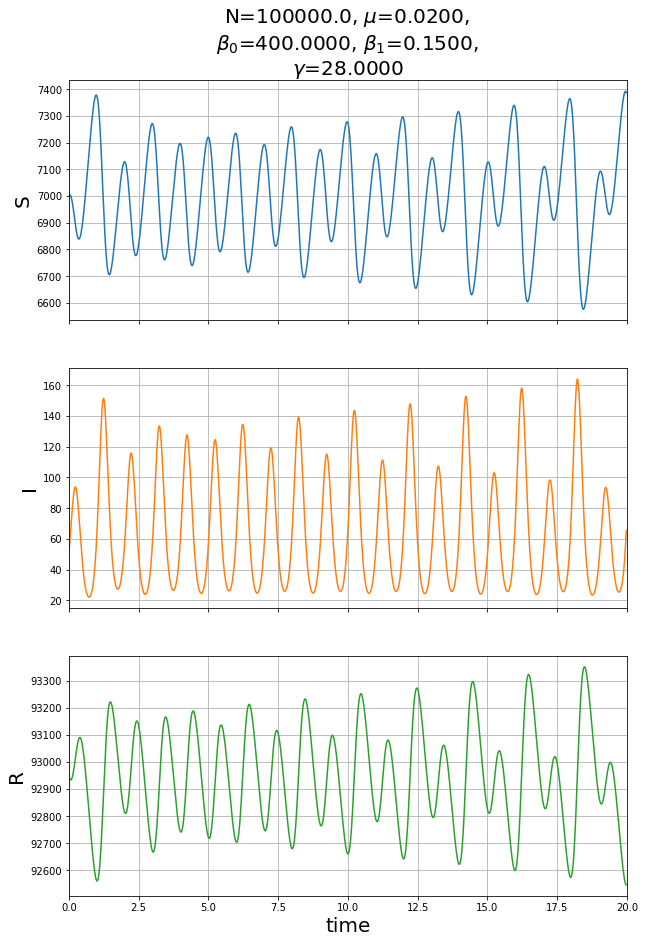

In [7]:
fig, ax_List = plt.subplots(3, 1, sharex=True, figsize=[10, 15])

for ii in range(3):
    ax_List[ii].plot(t_List, sol[:,ii], color="C{}".format(ii))
    ax_List[ii].grid(True)
    ax_List[ii].set_xlim([t_start, t_stop])

ax_List[0].set_ylabel("S", fontsize=20)
ax_List[1].set_ylabel("I", fontsize=20)
ax_List[2].set_ylabel("R", fontsize=20)

ax_List[2].set_xlabel("time", fontsize=20)

MyTitle = "N={}, ".format(N) + "$\mu$={:.4f}, \n".format(mu) +\
            r"$\beta_0$={:.4f}, ".format(beta_0) + r"$\beta_1$={:.4f}, ".format(beta_1) + "\n" +\
            r"$\gamma$={:.4f}".format(gamma)
ax_List[0].set_title(MyTitle, fontsize=20)

plt.show()

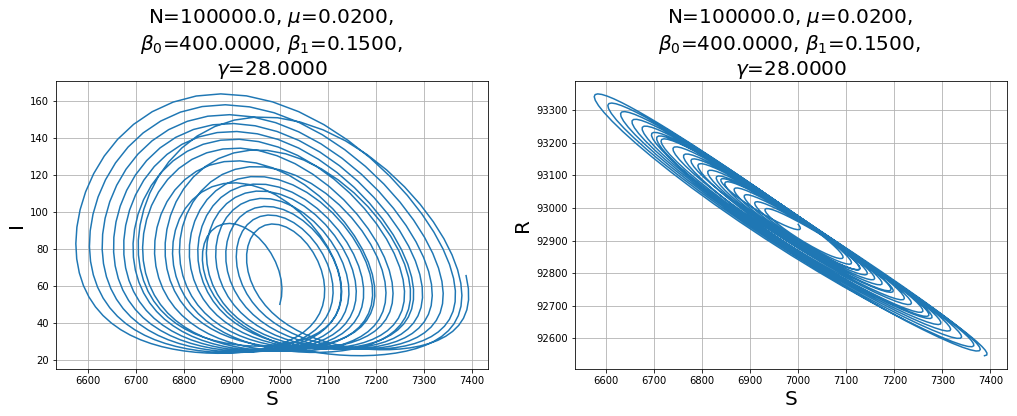

In [8]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.2, 0, 1, 1])

ax1.plot(sol[:,0], sol[:,1])
ax1.set_xlabel("S", fontsize=20)
ax1.set_ylabel("I", fontsize=20)

ax2.plot(sol[:,0], sol[:,2])
ax2.set_xlabel("S", fontsize=20)
ax2.set_ylabel("R", fontsize=20)

for ax in [ax1, ax2]:
    ax.grid(True)
    MyTitle = "N={}, ".format(N) + "$\mu$={:.4f}, \n".format(mu) +\
            r"$\beta_0$={:.4f}, ".format(beta_0) + r"$\beta_1$={:.4f}, ".format(beta_1) + "\n" +\
            r"$\gamma$={:.4f}".format(gamma)
    ax.set_title(MyTitle, fontsize=20)
plt.show()